<a href="https://colab.research.google.com/github/hinazain28/amazon-prime-EDA/blob/main/amazon_prime_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Amazon Prime Data EDA

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
uplaoded = files.upload()
df= pd.read_csv('amazon_prime_titles.csv')
df.head()
print("Rows and columns:",df.shape)
print("\ncolumn Names:\n", df.columns)
df.info()
df.describe(include='all')

Saving amazon_prime_titles.csv to amazon_prime_titles.csv
Rows and columns: (9668, 12)

column Names:
 Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7585 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(1

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,9668,9668,9668,7585,8435,672,155,9668.000000,9331,9668,9668,9668
unique,9668,2,9668,5773,7927,86,84,NaN,24,219,518,9414
top,s9668,Movie,Harry Brown,Mark Knight,Maggie Binkley,United States,"March 30, 2021",NaN,13+,1 Season,Drama,"Arpo was designed as a commando robot, built a..."
freq,1,7814,1,113,56,253,14,NaN,2117,1342,986,15
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.341849,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.922482,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1920.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [3]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2083
cast,1233
country,8996
date_added,9513
release_year,0
rating,337
duration,0


Questions I Want to Explore

1.  Understanding what content is available in different countries.
2.  Identifying similar content by matching
text-based features.
3.  Network analysis of Actors / Directors and find interesting insights.
4.  Does Amazon Prime has more focus on TV Shows than movies in recent years.







In [4]:
df_clean=df.dropna(subset=['cast', 'country'])
print(df_clean)


     show_id   type                  title                        director  \
0         s1  Movie    The Grand Seduction                    Don McKellar   
1         s2  Movie   Take Care Good Night                    Girish Joshi   
2         s3  Movie   Secrets of Deception                     Josh Webber   
3         s4  Movie     Pink: Staying True                  Sonia Anderson   
4         s5  Movie          Monster Maker                    Giles Foster   
...      ...    ...                    ...                             ...   
9604   s9605  Movie             Bride Wars                     Gary Winick   
9614   s9615  Movie  What Happens in Vegas                     Tom Vaughan   
9641   s9642  Movie            Marley & Me                   David Frankel   
9643   s9644  Movie     Love & Other Drugs                    Edward Zwick   
9644   s9645  Movie   Little Miss Sunshine  Jonathan Dayton, Valerie Faris   

                                                   cast        

**Question 1: What content is available in different countries?**

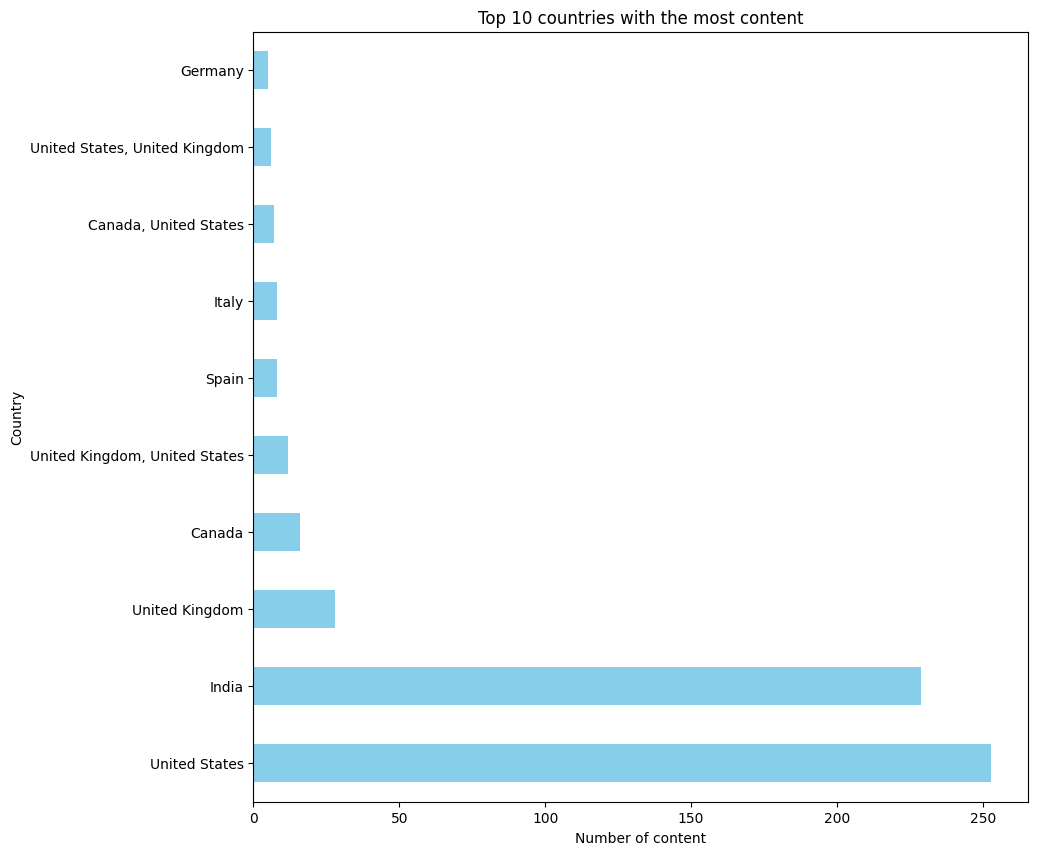

In [17]:
df['country'].value_counts().head(10).plot(kind='barh', figsize=(10,10), color='skyblue')
plt.title("Top 10 countries with the most content")
plt.xlabel("Number of content")
plt.ylabel("Country")
plt.show()

**Question 2: Finding similar content**

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Fill empty descriptions
df['description'] = df['description'].fillna('')

# Vectorize the text
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['description'])

# Find similarity scores
cos_sim = cosine_similarity(tfidf_matrix)

# Let’s see similar shows to the 10th one
similarity_scores = list(enumerate(cos_sim[10]))
similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
for i in similarity_scores[1:6]:
    print(df.iloc[i[0]]['title'], " — Score:", i[1])


Mobutu's African Movie Theater: Episode 5  — Score: 0.16225056696468584
Christmas Recipe for Romance  — Score: 0.15682238385471536
Netru Indru  — Score: 0.14723575591448787
Kalam  — Score: 0.13771213438318103
Fairytale: A True Story  — Score: 0.1375236800397828


**Question 3: Network analysis of actors and directors**

In [22]:
import pandas as pd
import networkx as nx
from tqdm import tqdm  # shows progress bar

# Step 1: Build the graph again
G = nx.Graph()

for cast in df['cast'].dropna():
    actors = cast.split(', ')
    for i in range(len(actors)):
        for j in range(i + 1, len(actors)):
            G.add_edge(actors[i], actors[j])

# Step 2: Create the table
actor_data = []

# Use tqdm to show progress bar
for actor in tqdm(G.nodes()):
    co_actors = list(G.neighbors(actor))
    actor_data.append({
        'Actor': actor,
        'Number of Co-Actors': len(co_actors),
        'List of Co-Actors': co_actors
    })

# Step 3: Make it a DataFrame
actor_df = pd.DataFrame(actor_data)

# Step 4: View the result
actor_df.head(10)  # Show first 10 rows





100%|██████████| 31370/31370 [00:00<00:00, 92394.57it/s]


,Actor,Number of Co-Actors,List of Co-Actors
0,Brendan Gleeson,17,"[Taylor Kitsch, Gordon Pinsent, Ray Winstone, ..."
1,Taylor Kitsch,5,"[Brendan Gleeson, Gordon Pinsent, Ryan Phillip..."
2,Gordon Pinsent,20,"[Brendan Gleeson, Taylor Kitsch, Christian Sla..."
3,Mahesh Manjrekar,35,"[Abhay Mahajan, Sachin Khedekar, John Abraham,..."
4,Abhay Mahajan,2,"[Mahesh Manjrekar, Sachin Khedekar]"
5,Sachin Khedekar,47,"[Mahesh Manjrekar, Abhay Mahajan, Mohanlal, Ma..."
6,Tom Sizemore,52,"[Lorenzo Lamas, Robert LaSardo, Richard Jones,..."
7,Lorenzo Lamas,31,"[Tom Sizemore, Robert LaSardo, Richard Jones, ..."
8,Robert LaSardo,14,"[Tom Sizemore, Lorenzo Lamas, Richard Jones, Y..."
9,Richard Jones,5,"[Tom Sizemore, Lorenzo Lamas, Robert LaSardo, ..."


**Question 4:  Is Amazon Prime focusing more on TV Shows now?**

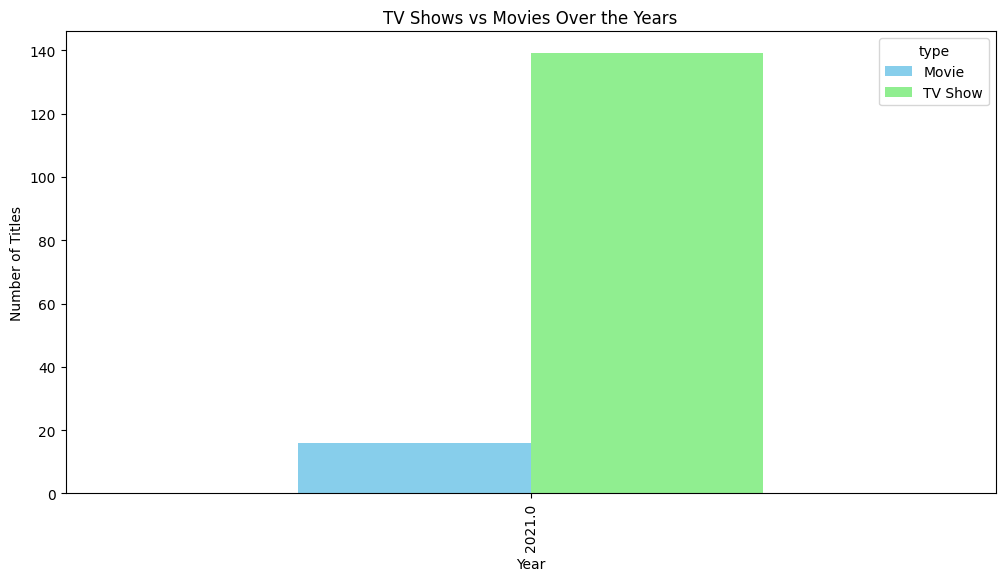

In [30]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year'] = df['date_added'].dt.year

type_trend = df.groupby(['year', 'type']).size().unstack()

type_trend.plot(kind='bar', figsize=(12,6), color=['skyblue', 'lightgreen'])
plt.title("TV Shows vs Movies Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.show()